In [39]:
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [41]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [42]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [43]:
df.shape

(5572, 2)

In [44]:
# 1. Data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

1. Data Cleaning

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [46]:
# Droping the unnecessary columns
#df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [47]:
df.sample(5)

,Category,Message
4238,ham,Life style garments account no please.
1605,ham,"God picked up a flower and dippeditinaDEW, lov..."
2552,ham,I'm done. C Ã¼ there.
1778,spam,Buy Space Invaders 4 a chance 2 win orig Arcad...
5546,ham,Ic. There are a lotta childporn cars then.


In [48]:
# renaming the columns
df.rename(columns={'Category':'target', "Message" : "text"},inplace=True)
df.sample(5)

,target,text
4125,ham,"Hey sexy buns ! Have I told you ? I adore you,..."
2825,ham,No need to buy lunch for me.. I eat maggi mee..
4981,ham,So what u doing today?
3965,ham,"If e timing can, then i go w u lor..."
5058,ham,Hey next sun 1030 there's a basic yoga course....


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
 # Missing values
df.isnull().sum() 

target    0
text      0
dtype: int64

In [51]:
# checking for duplicates
df.duplicated().sum()

np.int64(415)

In [52]:
# Removing the duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [53]:
df.shape

(5157, 2)

2. EDA

In [54]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
df["target"].value_counts()

target
0    4516
1     641
Name: count, dtype: int64

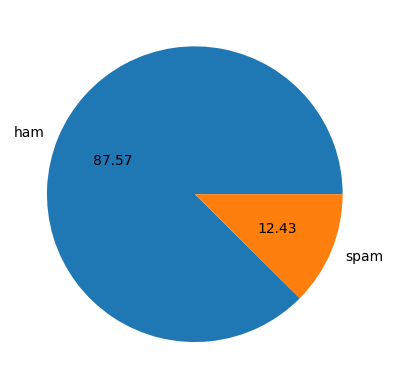

In [56]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [57]:
# Data is imbalanced


In [58]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [59]:
df["num_characters"] = df['text'].apply(len)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_25872\1155842742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"] = df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [60]:
# number of words
df["num_words"] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_25872\3137448527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [61]:
df["num_sentences"] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_25872\1768808883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentences"] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [62]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.228427,18.544890,1.969750
std,58.452966,13.401415,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [63]:
# ham emails
df[df["target"] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.951506,17.250664,1.827724
std,56.732233,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [64]:
#spam emails
df[df["target"] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.541342,27.663027,2.970359
std,30.516111,7.104050,1.485575
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [65]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

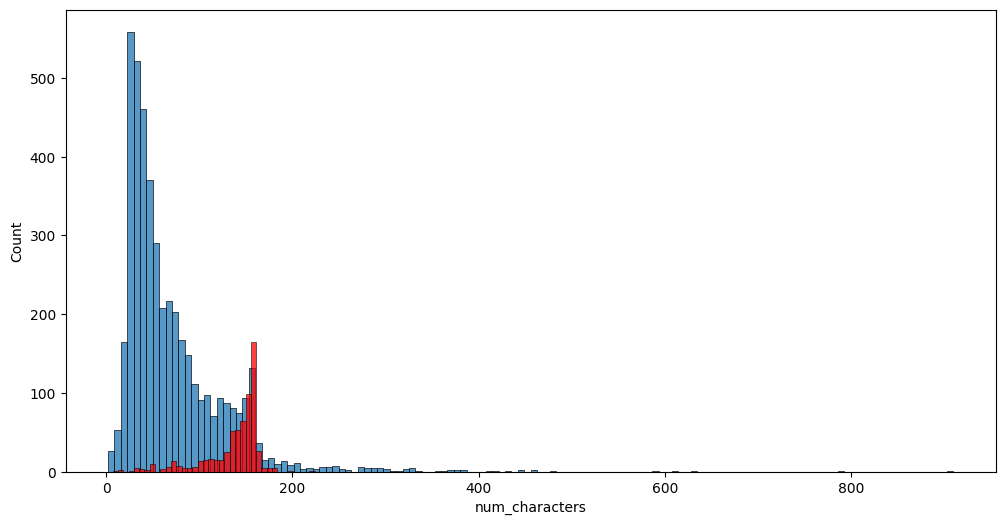

In [66]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"] == 0]['num_characters'])
sns.histplot(df[df["target"] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

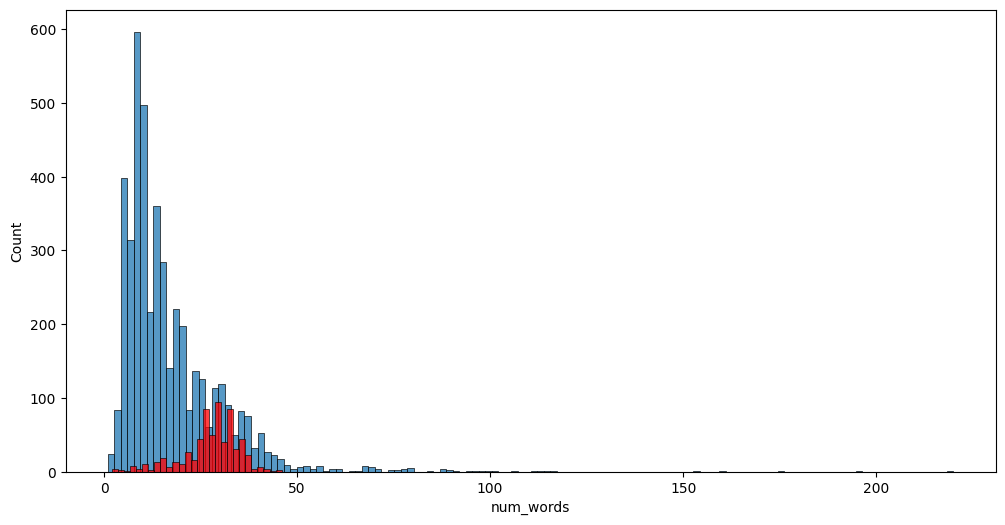

In [67]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"] == 0]['num_words'])
sns.histplot(df[df["target"] == 1]['num_words'],color='red')

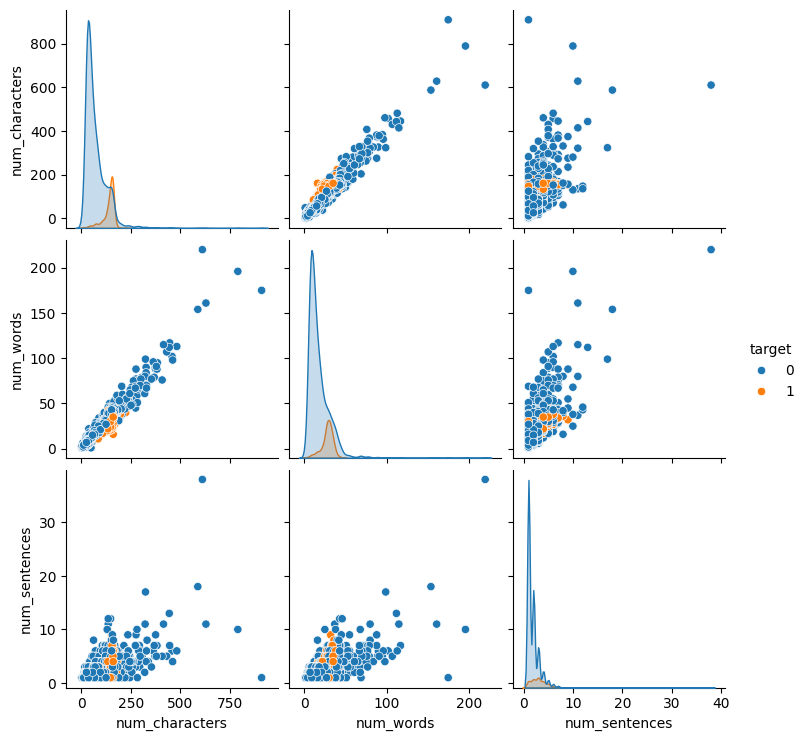

In [68]:
sns.pairplot(df, hue='target')

<Axes: >

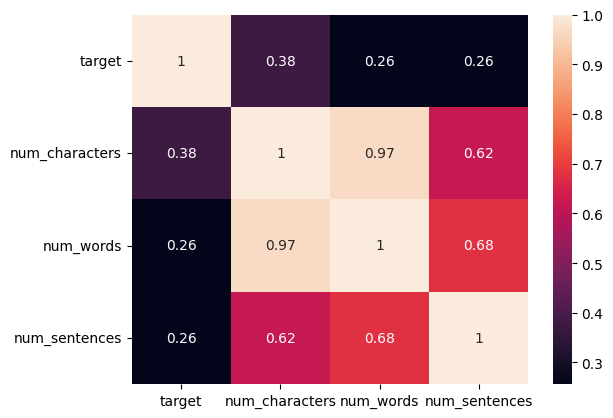

In [69]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

3. Data Preprocessing 

 . Lower case
 . Tokenization 
. Removing special characters
. removing stop words and punctuation
. stemming

In [70]:
import string

In [71]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [72]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [73]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [74]:
transform_text("I loved the YT lacture on machine learning. How about you?")

'love yt lactur machin learn'

In [75]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat.")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [76]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_25872\568599122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [77]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df["target"] == 1]['transformed_text'].str.cat(sep=" "))

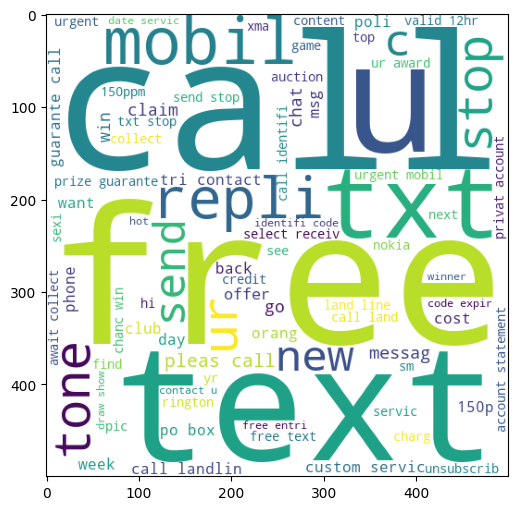

In [78]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [79]:
spam_wc = wc.generate(df[df["target"] == 0]['transformed_text'].str.cat(sep=" "))

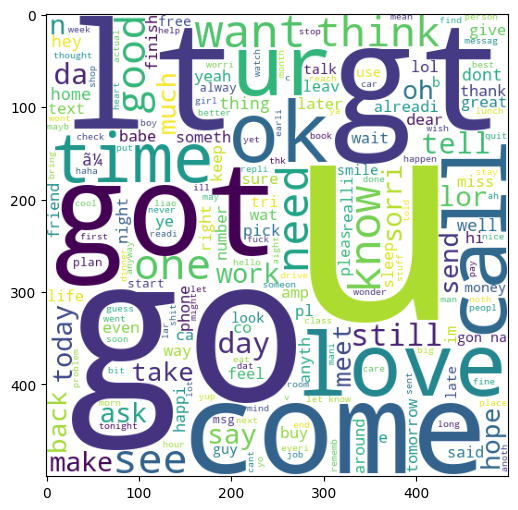

In [80]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [81]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [82]:
spam_corpus =[ ]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [83]:
len(spam_corpus)

9774

In [84]:
from collections import Counter


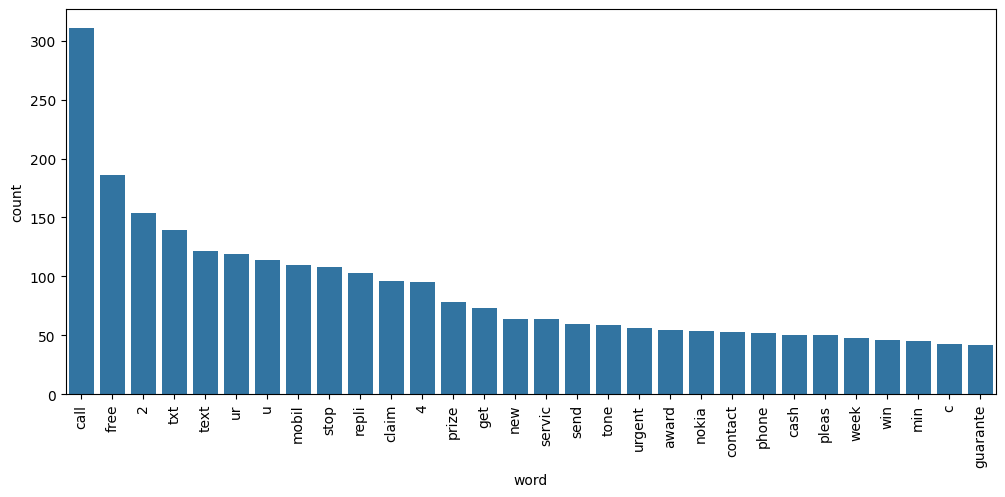

In [85]:

# DataFrame banao
spam_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=['word', 'count']
)

# Plot
plt.figure(figsize=(12,5))
sns.barplot(data=spam_df, x='word', y='count')
plt.xticks(rotation=90)
plt.show()


In [86]:
ham_corpus =[ ]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [87]:
len(ham_corpus)

35879

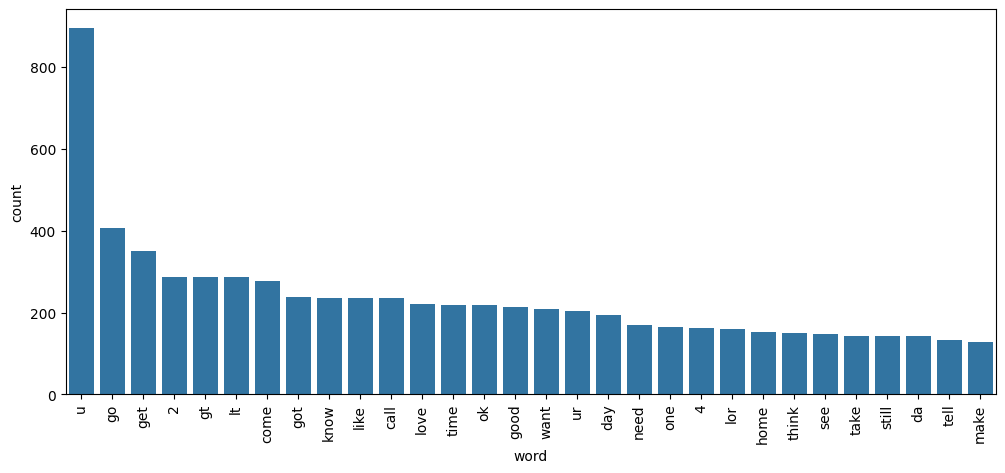

In [88]:

# DataFrame banao
ham_df = pd.DataFrame(
    Counter(ham_corpus).most_common(30),
    columns=['word', 'count']
)

# Plot
plt.figure(figsize=(12,5))
sns.barplot(data=ham_df, x='word', y='count')
plt.xticks(rotation=90)
plt.show()


4. Model Building

In [89]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [90]:
X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5157, 6777)

In [91]:
Y = df['target'].values
Y.shape

(5157,)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [108]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [109]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [110]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred1))
print(confusion_matrix(Y_test, Y_pred1))
print(precision_score(Y_test, Y_pred1))


0.8691860465116279
[[786 119]
 [ 16 111]]
0.4826086956521739


In [112]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))
print(precision_score(Y_test, Y_pred2)) 

0.9796511627906976
[[895  10]
 [ 11 116]]
0.9206349206349206


In [98]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))
print(precision_score(Y_test, Y_pred3))


0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


In [99]:
# Tfidf --> mnb

In [114]:
import pickle
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
pickle.dump(bnb, open('model1.pkl', 'wb'))
